In [101]:
%matplotlib inline

In [102]:
import pymysql

# your username and password go here!
creds = {'user': 'brian', 
         'pswd': 'farley'} 


connection = pymysql.connect(host="atriskwiki.cbprs6vpqcbz.us-west-1.rds.amazonaws.com",
                            user=creds['user'],
                            password=creds['pswd'],
                            port=3306,
                            db="atriskwiki",
                            charset="utf8")

cur = connection.cursor()

In [103]:
import pandas as pd
query_col_list = ['page_id','page_is_ep','page_in_train','page_info_pulled','page_touched','page_len']
query = "SELECT {} FROM core"
cols = ",".join(query_col_list)
cur.execute(query.format(cols))

df = pd.DataFrame(list(cur.fetchall()), columns=query_col_list)

In [104]:
def WikiTimeToUsefulTime(x):
    x = str(x)
    year = x[:4]
    month = x[4:6]
    day = x[6:8]
    return "{}-{}-{}".format(year,month,day)

df['page_touched'] = pd.Series([pd.to_datetime(WikiTimeToUsefulTime(x)) for x in df['page_touched']])
df['page_info_pulled'] = pd.Series([pd.to_datetime(WikiTimeToUsefulTime(x)) for x in df['page_info_pulled']])

In [105]:
df['page_info_pulled']

0       2016-07-09
1       2016-07-09
2       2016-07-09
3       2016-07-09
4       2016-07-09
5       2016-07-09
6       2016-07-09
7       2016-07-09
8       2016-07-09
9       2016-07-09
10      2016-07-09
11      2016-07-09
12      2016-07-09
13      2016-07-09
14      2016-07-09
15      2016-07-09
16      2016-07-09
17      2016-07-09
18      2016-07-09
19      2016-07-09
20      2016-07-09
21      2016-07-09
22      2016-07-09
23      2016-07-09
24      2016-07-09
25      2016-07-09
26      2016-07-09
27      2016-07-09
28      2016-07-09
29      2016-07-09
           ...    
57402   2016-07-09
57403   2016-07-10
57404   2016-07-10
57405   2016-07-10
57406   2016-07-10
57407   2016-07-10
57408   2016-07-10
57409   2016-07-10
57410   2016-07-10
57411   2016-07-10
57412   2016-07-10
57413   2016-07-10
57414   2016-07-10
57415   2016-07-10
57416   2016-07-10
57417   2016-07-10
57418   2016-07-10
57419   2016-07-10
57420   2016-07-10
57421   2016-07-10
57422   2016-07-10
57423   2016

In [106]:
import matplotlib.pyplot as plt
import numpy as np

grouped_by_ep = df.groupby('page_is_ep')

In [107]:
df['page_info_pulled'] - df['page_touched']

0        4 days
1        0 days
2        0 days
3        1 days
4        5 days
5        4 days
6        1 days
7        4 days
8        5 days
9        0 days
10       1 days
11       0 days
12       2 days
13       0 days
14       1 days
15       5 days
16       4 days
17       3 days
18       0 days
19       2 days
20       5 days
21       3 days
22       1 days
23       5 days
24       1 days
25       1 days
26       4 days
27       2 days
28       3 days
29       1 days
          ...  
57402   -1 days
57403    2 days
57404    0 days
57405    1 days
57406    2 days
57407    2 days
57408    0 days
57409    0 days
57410    1 days
57411    1 days
57412    1 days
57413    1 days
57414    1 days
57415   -1 days
57416    0 days
57417    0 days
57418    1 days
57419    0 days
57420    0 days
57421    0 days
57422    0 days
57423    0 days
57424    0 days
57425    0 days
57426    0 days
57427    0 days
57428    0 days
57429   -1 days
57430   -1 days
57431   -1 days
dtype: timedelta64[ns]

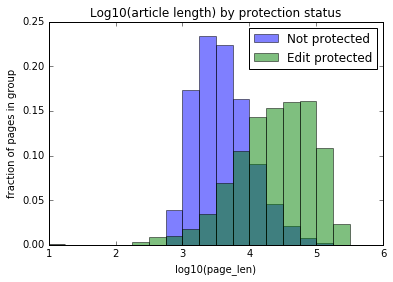

In [108]:
bins = np.arange(1,6.25,0.25)
labels = ['Not protected','Edit protected']

for name, group in grouped_by_ep:
    log10len = np.log10(group['page_len'])
    weights = np.ones_like(log10len)/len(log10len) #necessary to keep sum of all bins per label=1
    plt.hist(log10len,alpha=0.5,weights=weights,bins=bins,label=labels[name])
    
plt.legend(loc='best')
plt.title("Log10(article length) by protection status")
plt.xlabel("log10(page_len)")
plt.ylabel("fraction of pages in group")
plt.show()

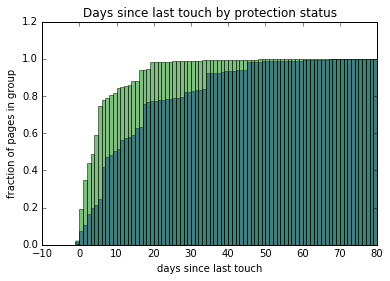

In [143]:
bins = np.arange(-1,81,1)

for name,group in grouped_by_ep:
    timeElapsedSinceTouch = (group['page_info_pulled'] - group['page_touched']) / np.timedelta64(1,"D")
    weights = np.ones_like(timeElapsedSinceTouch)/len(timeElapsedSinceTouch)
    plt.hist(timeElapsedSinceTouch,alpha=0.5,bins=bins,weights=weights,label=labels[name],cumulative=True)

plt.title("Days since last touch by protection status")
plt.ylabel("fraction of pages in group")
plt.xlabel("days since last touch")
plt.show()

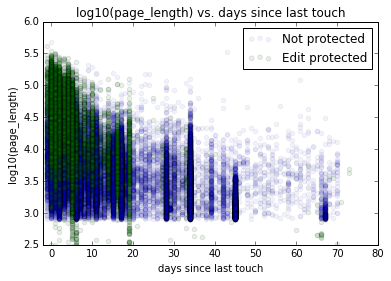

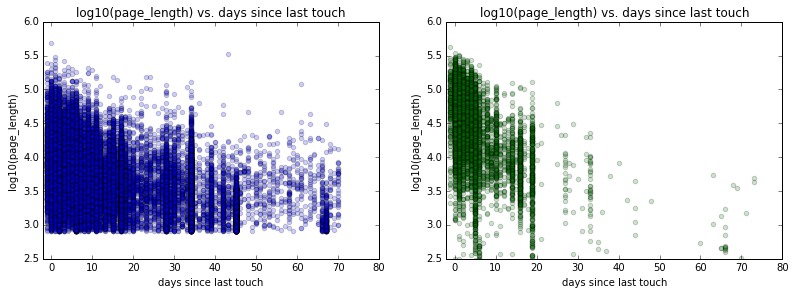

In [110]:
colors = ['b','g']
alphas = [0.05,0.1]
for name,group in grouped_by_ep:
    timeElapsedSinceTouch = (group['page_info_pulled'] - group['page_touched']) / np.timedelta64(1,"D")
    log10len = np.log10(group['page_len'])
    plt.scatter(timeElapsedSinceTouch,log10len,label=labels[name],alpha=alphas[name],c=colors[name])

plt.xlim([-2,80])
plt.ylim([2.5,6])
plt.title("log10(page_length) vs. days since last touch")
plt.xlabel("days since last touch")
plt.ylabel("log10(page_length)")
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(13.25,4.25))
for name,group in grouped_by_ep:
    timeElapsedSinceTouch = (group['page_info_pulled'] - group['page_touched']) / np.timedelta64(1,"D")
    log10len = np.log10(group['page_len'])
    plt.subplot(1,2,name+1)
    plt.scatter(timeElapsedSinceTouch,log10len,alpha=0.2,c=colors[name])
    plt.xlim([-2,80])
    plt.ylim([2.5,6])
    plt.title("log10(page_length) vs. days since last touch")
    plt.xlabel("days since last touch")
    plt.ylabel("log10(page_length)")
plt.show()

In [115]:
epa = grouped_by_ep.get_group(1).copy()
epa['days_since_touch'] = (epa['page_info_pulled'] - epa['page_touched']) / np.timedelta64(1,"D")

In [116]:
epa['days_since_touch']

0         4.0
1         0.0
2         0.0
3         1.0
4         5.0
5         4.0
6         1.0
7         4.0
8         5.0
9         0.0
10        1.0
11        0.0
12        2.0
13        0.0
14        1.0
15        5.0
16        4.0
17        3.0
18        0.0
19        2.0
20        5.0
21        3.0
22        1.0
23        5.0
24        1.0
25        1.0
26        4.0
27        2.0
28        3.0
29        1.0
         ... 
56654     0.0
56671     4.0
56677     2.0
56714     6.0
56715    14.0
56766     3.0
56767     3.0
56783     5.0
56787    14.0
56793     0.0
56817     0.0
56819     0.0
56840     1.0
56846     0.0
56850     2.0
56919     2.0
56949     6.0
57014     0.0
57022     9.0
57111    11.0
57119    -1.0
57140     0.0
57156     2.0
57181     1.0
57234     0.0
57268     0.0
57309    -1.0
57389    -1.0
57396     0.0
57402    -1.0
Name: days_since_touch, dtype: float64

In [139]:
log10Len = pd.Series(np.log10(epa['page_len']))
log10Days = pd.Series(np.log10(epa['days_since_touch'] + 10))
epa_log = pd.concat([log10Len,log10Days], axis=1)

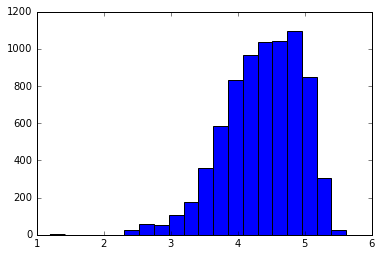

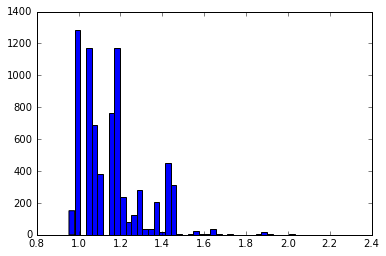

In [140]:
plt.hist(epa_log['page_len'],bins=20)
plt.show()

plt.hist(epa_log['days_since_touch'],bins=50)
plt.show()